In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.neural_network import MLPClassifier
from sklearn import preprocessing
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [32]:
df = pd.read_csv('wine.csv')
df

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,bad
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,bad
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,bad
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,good
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,bad
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,bad
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,good
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,good
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,bad


In [33]:
encoder = preprocessing.LabelEncoder()

df['quality'] = encoder.fit_transform(df['quality'])
fueltype = {index : label for index, label in enumerate(encoder.classes_)}
df

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,1
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,1
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,1
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0


In [34]:
df.isnull().values.any()

False

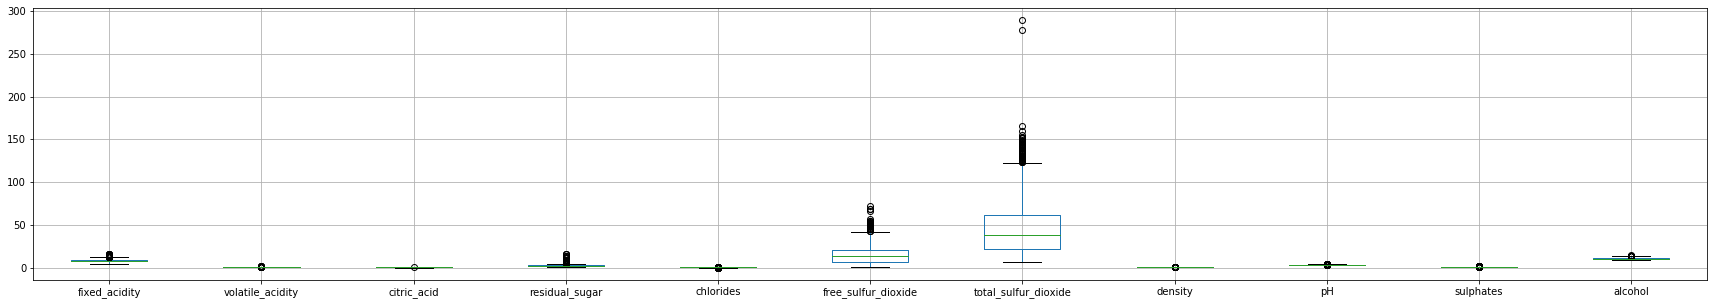

In [35]:
plt.figure(figsize=(30,5))
df.drop(['quality'], axis=1).boxplot()
print()

In [36]:
def outliers(df, column):
    temp = df[column]
    q1 = temp.quantile(0.25)
    q3 = temp.quantile(0.75)
    irq = q3 - q1
    outliers_min = q1 - (1.5 * irq)
    outliers_max = q3 + (1.5 * irq)

    df = df[df[column] >= outliers_min]
    df = df[df[column] <= outliers_max]
    return df

In [43]:
df = outliers(df, 'fixed_acidity')
df = outliers(df, 'volatile_acidity')
df = outliers(df, 'citric_acid')
df = outliers(df, 'residual_sugar')
df = outliers(df, 'chlorides')
df = outliers(df, 'free_sulfur_dioxide')
df = outliers(df, 'total_sulfur_dioxide')
df = outliers(df, 'density')
df = outliers(df, 'pH')
df = outliers(df, 'sulphates')
df = outliers(df, 'alcohol')

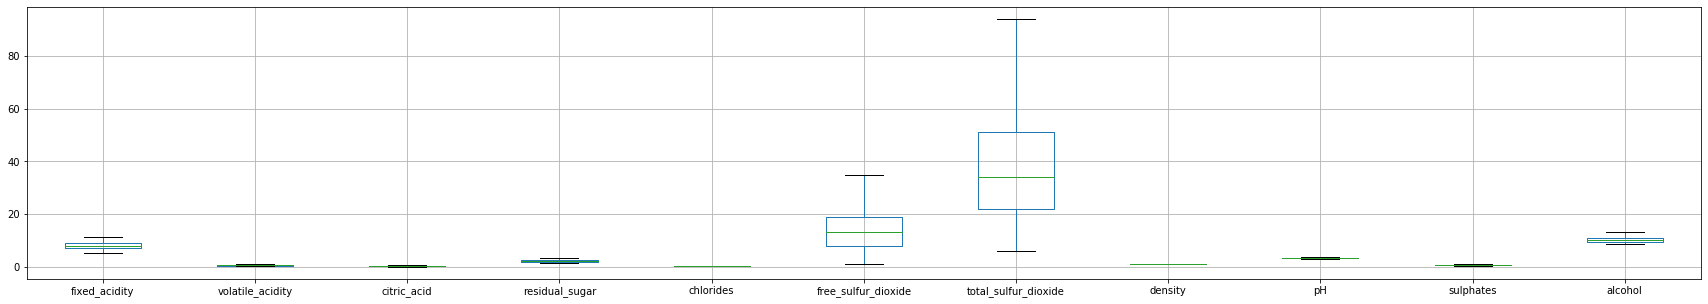

In [44]:
plt.figure(figsize=(30,5))
df.drop(['quality'], axis=1).boxplot()
print()

In [45]:
df

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,1
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1592,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,1
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,1
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,1


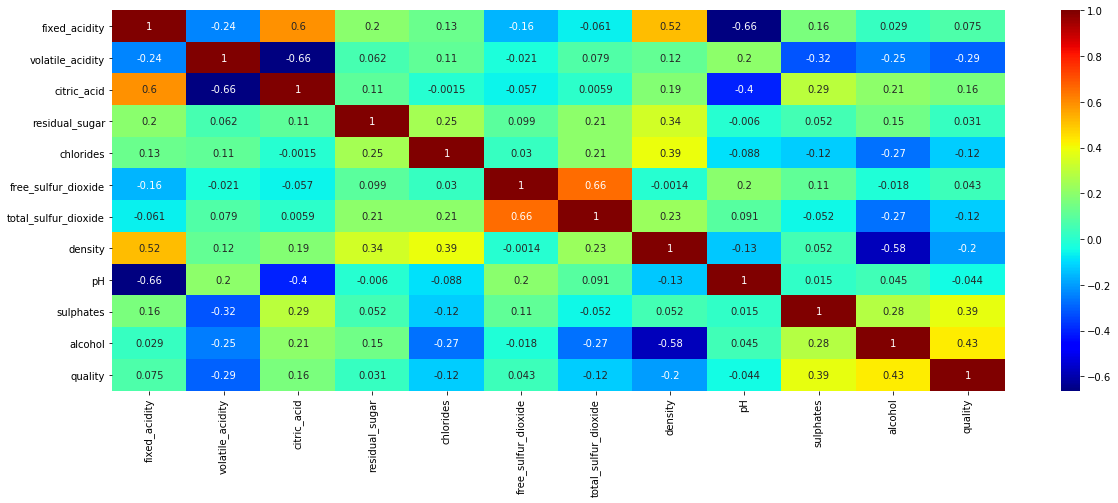

In [46]:
plt.figure(figsize=(20,7))
cor = df.corr()
sns.heatmap(cor, annot = True, cmap='jet')

In [47]:
Y = df['quality']
X = df[['fixed_acidity', 'fixed_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol']]

In [104]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)
print(X_train.shape) 
print(X_test.shape)
Y_test = np.array(Y_test)

(741, 11)
(186, 11)


In [144]:
mlp = MLPClassifier(hidden_layer_sizes=(6, 6, 6), activation='relu', max_iter = 1500)
mlp.fit(X_train,Y_train)

predicted = mlp.predict(X_test)

c = []
for j in range(len(Y_test)):
    b = Y_test[j] - predicted[j]
    if b != 0:
        c.append(b)
err_y = len(c)/len(Y_test)
err_y

0.2849462365591398

In [145]:
accuracy_score(Y_test, predicted)

0.7150537634408602

In [146]:
df0 = pd.DataFrame({'Atual': Y_test, 'Predicted': predicted})
df0

,Atual,Predicted
0,1,1
1,1,0
2,1,1
3,1,1
4,0,0
...,...,...
181,1,1
182,1,1
183,1,0
184,0,0


In [147]:
mlp.coefs_

[array([[-3.65814035e-01, -2.63962691e-19, -2.91942287e-01,
          2.52773957e-01,  8.19790262e-03,  1.25912037e-02],
        [-1.53744152e-01, -4.75064418e-12, -5.13765408e-01,
          5.06321336e-02, -2.21352130e-01, -1.20386593e-01],
        [ 2.29118304e+00,  3.70604865e-35, -8.72258024e-01,
          1.05487716e-02,  1.69376095e-01, -1.35667065e+00],
        [-2.24174031e-01,  4.77098829e-08, -1.50284567e-01,
          2.90117690e-01,  5.32582072e-01,  1.11608028e-01],
        [-7.74555728e-01,  3.27335886e-12,  9.90853434e-01,
         -3.87879407e-01,  1.67071496e-01,  1.33596711e+00],
        [ 4.52995812e-01, -1.48908221e-10,  5.80311409e-01,
         -3.11390855e-01,  3.63369123e-01,  2.66405829e-01],
        [ 2.75479335e-02,  1.11835428e-52,  4.56592170e-01,
          6.17097973e-02, -3.04530249e-01,  4.89885501e-02],
        [-8.81256402e-01,  3.08504637e-38,  1.17924842e-01,
         -5.94850359e-01, -5.62391138e-03,  3.44903311e-01],
        [-7.36750814e-01,  2.220

In [148]:
mlp.n_iter_

726

In [149]:
mlp.n_layers_

5